In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
url = 'https://raw.githubusercontent.com/awarischool/EDA-exercises/master/titanic.csv'

In [ ]:
df = pd.read_csv(url,encoding='latin')
print(df.shape)
df.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



1. Qual foi a porcentagem dos passageiros sobreviventes?

Dica: use a função value_counts() do pandas com o parâmetro normalize

In [ ]:
print(f"A porcentagem de passageiros sobreviventes foi {round(100*df['Survived'].value_counts(normalize=True)[1],2)}%.")

A porcentagem de passageiros sobreviventes foi 38.38%.



2. Qual era a faixa etária dos passageiros que estavam no Titanic?

In [ ]:
print(f"A faixa de idade varia de {df['Age'].min()} anos até {df['Age'].max()} anos.")

A faixa de idade varia de 0.42 anos até 80.0 anos.



3. Qual porcentagem de homens e mulheres sobreviventes?

In [ ]:
print(f"O percentual de mulheres sobreviventes foi {round(100*df.groupby('Sex').agg({'Survived': 'mean'}),2)['Survived'][0]}%")
print(f"O percentual de homens sobreviventes foi {round(100*df.groupby('Sex').agg({'Survived': 'mean'}),2)['Survived'][1]}%")

O percentual de mulheres sobreviventes foi 74.2%
O percentual de homens sobreviventes foi 18.89%


In [ ]:
df_grouped = df.groupby('Sex').agg({'Survived': 'mean'}).reset_index()
df_grouped.loc[df_grouped['Sex'] == 'male', 'Survived'].values[0]

0.18890814558058924

In [ ]:
df_grouped.loc[df_grouped['Sex'] == 'female', 'Survived'].values[0]

0.7420382165605095


4. Quais os tipos de variáveis nas colunas survived, pclass, name, sex e age?

In [ ]:
col = ['Survived','Pclass','Name','Sex','Age']
print(df[col].dtypes)

Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
dtype: object



5. Qual o tipo de classe de passagem mais frequente nos dados?

In [ ]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64


6. Qual a média e desvio padrão do valor das passagens?

In [ ]:
print(f"O valor das passagens tem média {round(df['Fare'].mean(),2)} e desvio padrão {round(df['Fare'].std(),2)}.")

O valor das passagens tem média 32.2 e desvio padrão 49.69.



7. Existem outliers na coluna age? Quais? Crie um boxplot para esse atributo.

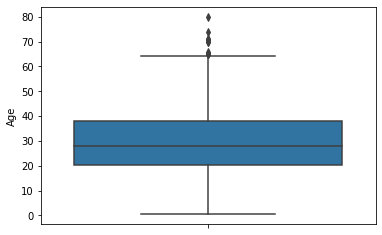

In [ ]:
ax = sns.boxplot(y="Age", data=df)
#Constato a presença de outliers devido à presença de passageiros com idade superior aos 60 anos

In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
IQR = df['Age'].quantile(0.75)-df['Age'].quantile(0.25)
OutMin = df['Age'].quantile(0.25)-1.5*IQR
OutMax = df['Age'].quantile(0.75)+1.5*IQR
print(IQR)
print(OutMax)
print(OutMin)

17.875
64.8125
-6.6875



8. Cria um histograma para os atributos age, pclass e fare. Quais informações você pode extrair desses gráficos?

Idade concentrada entre 18 e 35 anos. Maioria integrantes da terceira classe. Presença de fortes outliers superiores nítida na distribuição de títulos. Desigualdade de renda dos passageiros aparentemente alta.


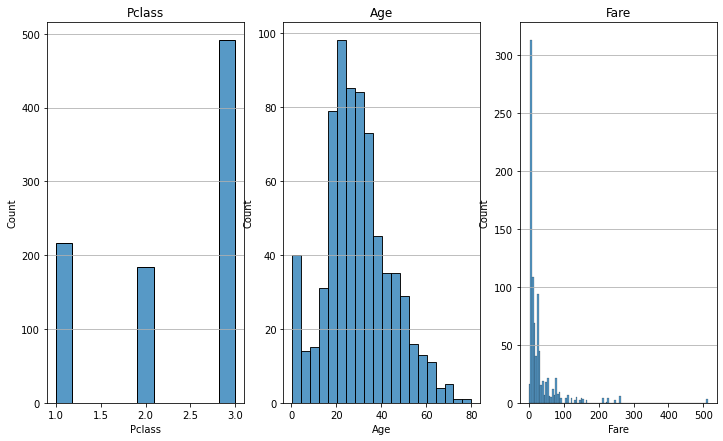

In [ ]:
col = ['Pclass','Age','Fare']
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12,7))
for ax, i in zip(axes.flatten(), col):
    sns.histplot(data=df, x=i, ax=ax)
    ax.set_title(i)
    ax.grid(axis='y')